In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'WR', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,michael thomas,WR,NO,3.2,21.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.25,22.25
1,2020,1,davante adams,WR,GB,34.6,33.0,2,NaN,NaN,NaN,NaN,87.500000,7.466125,0.476190,-1.0,21.50,23.00
2,2020,1,julio jones,WR,ATL,20.2,36.0,3,NaN,NaN,NaN,NaN,92.500000,6.544513,0.476190,1.0,NaN,NaN
3,2020,1,tyreek hill,WR,KC,13.1,37.0,4,NaN,NaN,NaN,NaN,74.500000,5.442461,0.565217,1.0,31.50,22.00
4,2020,1,chris godwin,WR,TB,10.9,45.0,5,NaN,NaN,NaN,NaN,70.500000,5.548948,0.444444,-1.0,22.25,26.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2023,17,equanimeous st,WR,CHI,0.0,266.0,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.75,18.25
6041,2023,17,van jefferson,WR,ATL,3.4,270.0,112,NaN,NaN,NaN,NaN,11.488149,1.339031,0.125000,-1.0,18.25,20.75
6042,2023,17,julio jones,WR,PHI,16.4,272.0,113,NaN,NaN,NaN,NaN,8.500000,1.343000,0.100000,1.0,30.25,17.75
6043,2023,17,khadarel hodge,WR,ATL,0.0,297.0,119,NaN,NaN,NaN,NaN,8.500000,0.640297,0.083333,-1.0,18.25,20.75


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Receptions Projection',
    'Adjusted Receiving Yards Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Receptions Projection,Adjusted Receiving Yards Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,21.0,1,1.0,26.25,22.25,NaN,NaN,NaN,NaN
1,33.0,2,-1.0,21.50,23.00,7.466125,87.500000,NaN,0.476190
2,36.0,3,1.0,NaN,NaN,6.544513,92.500000,NaN,0.476190
3,37.0,4,1.0,31.50,22.00,5.442461,74.500000,NaN,0.565217
4,45.0,5,-1.0,22.25,26.25,5.548948,70.500000,NaN,0.444444
...,...,...,...,...,...,...,...,...,...
6040,266.0,110,1.0,20.75,18.25,NaN,NaN,NaN,NaN
6041,270.0,112,-1.0,18.25,20.75,1.339031,11.488149,NaN,0.125000
6042,272.0,113,1.0,30.25,17.75,1.343000,8.500000,NaN,0.100000
6043,297.0,119,-1.0,18.25,20.75,0.640297,8.500000,NaN,0.083333


In [3]:
y = df_mod['Fantasy Points'].copy()

y

0        3.2
1       34.6
2       20.2
3       13.1
4       10.9
        ... 
6040     0.0
6041     3.4
6042    16.4
6043     0.0
6044     0.0
Name: Fantasy Points, Length: 6045, dtype: float64

In [4]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
6040    2023 Week 17
6041    2023 Week 17
6042    2023 Week 17
6043    2023 Week 17
6044    2023 Week 17
Length: 6045, dtype: object

In [5]:
df_folds = pd.read_parquet('../../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [6]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
            X_train = X_is.iloc[train_indexes]
            X_val = X_is.iloc[val_indexes]

            y_train = y_is.iloc[train_indexes]
            y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Receiving Yards Projection']*0.1 + 
        X_train['Adjusted Receptions Projection']*0.5 + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    scaler2 = MinMaxScaler(clip=True)  # maybe normalize and clip instead of standardize?
    scaler3 = StandardScaler()
    X_train[X_train.columns] = scaler3.fit_transform(scaler2.fit_transform(X_train)).copy()

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Receiving Yards Projection']*0.1 + 
        X_val['Adjusted Receptions Projection']*0.5 + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_val[X_val.columns] = scaler3.transform(scaler2.transform(X_val)).copy()

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Receiving Yards Projection']*0.1 + 
        X_oos['Adjusted Receptions Projection']*0.5 + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_oos[X_oos.columns] = scaler3.transform(scaler2.transform(X_oos)).copy()

    X_train.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(3316, 6) (648, 6) (2081, 6) (3316,) (648,) (2081,) (2081, 18)
(3466, 6) (636, 6) (1943, 6) (3466,) (636,) (1943,) (1943, 18)
(3412, 6) (612, 6) (2021, 6) (3412,) (612,) (2021,) (2021, 18)


In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(input_shape: tuple, hidden_layer_neurons: list, l1s: list, l2s: list, learning_rate: float):
    enable_op_determinism()
    set_seed(22)
    
    inputs = Input(shape=input_shape, name='input')

    h = inputs
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons, 
            activation='relu', 
            kernel_initializer=GlorotNormal(seed=22), 
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]), 
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(1, activation=None, kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=inputs, outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mean_absolute_error'])

    return mod

mod = build_and_compile_model(X.shape[1:], [128, 32], [0, 0.01], [0, 0.01], learning_rate=0.001)

mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 9)]               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               1280      
                                                                 
 hidden_2 (Dense)            (None, 32)                4128      
                                                                 
 outputs (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.metrics import root_mean_squared_error
import optuna

def objective(trial, cv_data=cv_data):
# model tuning
    n_hidden_layers = trial.suggest_int(f"n_hidden_layers", 1, 3)

    hidden_layer_neurons = []
    l1s = []
    l2s = []
    for i in range(n_hidden_layers):
        hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(5, 12)]))  # change to (3, 12)
        # hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(4, 9)]))  # bump this up
        l1s.append(trial.suggest_float(f"hidden_layer_{i+1}_l1", 0.0, 0.1))  # change to (0.0, 0.05)
        l2s.append(trial.suggest_float(f"hidden_layer_{i+1}_l2", 0.0, 0.1))  # change to (0.0, 0.20)

    learning_rate = trial.suggest_float(f"learning_rate", 0.01, 0.10)
    batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(10, 16)])
    # batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(4, 12)])  # bump this up

    # cross validation
    y_oos_list = []
    y_pred_list = []
    for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
        # make sure to build mod in loop to prevent history
        mod = build_and_compile_model(X_train.shape[1:], hidden_layer_neurons, l1s, l2s, learning_rate)

        mod.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=500,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
            verbose=0,
        )

        y_oos_list.append(y_oos)
        y_pred_list.append(mod.predict(X_oos, verbose=0))

    y_oos_concat = np.concatenate(y_oos_list)
    y_pred_concat = np.concatenate(y_pred_list)

    return root_mean_squared_error(y_oos_concat, y_pred_concat)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=10, multivariate=True, warn_independent_sampling=False))
study.optimize(objective, n_trials=20, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\optuna\_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-23 17:43:15,605] A new study created in memory with name: no-name-39d09475-7934-4587-ae4e-21eae757921f


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2024-10-23 17:43:36,542] Trial 0 finished with value: 6.138094982285332 and parameters: {'n_hidden_layers': 1, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.022040451663772567, 'hidden_layer_1_l2': 0.08119509205386867, 'learning_rate': 0.01094741868844976, 'batch_size': 2048}. Best is trial 0 with value: 6.138094982285332.
[I 2024-10-23 17:44:00,608] Trial 1 finished with value: 6.15440117941648 and parameters: {'n_hidden_layers': 3, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.058428964315689495, 'hidden_layer_1_l2': 0.07026355188654519, 'hidden_layer_2_neurons': 128, 'hidden_layer_2_l1': 0.08749277452777171, 'hidden_layer_2_l2': 0.07449320773686179, 'hidden_layer_3_neurons': 256, 'hidden_layer_3_l1': 0.009588460991804116, 'hidden_layer_3_l2': 0.004521011190769353, 'learning_rate': 0.07163458468004151, 'batch_size': 1024}. Best is trial 0 with value: 6.138094982285332.
[I 2024-10-23 17:44:07,527] Trial 2 finished with value: 12.083120886174829 and parameters: {'n_h

{'n_hidden_layers': 1,
 'hidden_layer_1_neurons': 1024,
 'hidden_layer_1_l1': 0.05449800522917303,
 'hidden_layer_1_l2': 0.05887013726034685,
 'learning_rate': 0.03022336340325945,
 'batch_size': 32768}

6.136426845713258

In [9]:
n_hidden_layers = study.best_params['n_hidden_layers']

hidden_layer_neurons = []
l1s = []
l2s = []
for i in range(n_hidden_layers):
    hidden_layer_neurons.append(study.best_params[f"hidden_layer_{i+1}_neurons"])
    l1s.append(study.best_params[f"hidden_layer_{i+1}_l1"])
    l2s.append(study.best_params[f"hidden_layer_{i+1}_l2"])

learning_rate = study.best_params[f"learning_rate"]
batch_size = study.best_params[f"batch_size"]

y_oos_list = []
y_pred_list = []
testing_data = []
for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    # make sure to build mod in loop to prevent history
    mod = build_and_compile_model(X_train.shape[1:], hidden_layer_neurons, l1s, l2s, learning_rate)

    mod.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1,
    )

    y_preds = mod.predict(X_oos, verbose=0)

    df_preds = pd.DataFrame(
        y_preds,
        columns=['Prediction']
    )

    testing_data.append(pd.concat((df_mod_oos.reset_index(drop=True), df_preds), axis=1))


    y_oos_list.append(y_oos)
    y_pred_list.append(y_preds)

df_test = pd.concat(testing_data, ignore_index=True)

y_oos_concat = np.concatenate(y_oos_list)
y_pred_concat = np.concatenate(y_pred_list)

print(f"OOS RMSE: {root_mean_squared_error(y_oos_concat, y_pred_concat)}")

Epoch 1/500
1/1 [==============================] - 1s 745ms/step - loss: 136.2148 - mean_absolute_error: 8.4072 - val_loss: 91.5718 - val_mean_absolute_error: 6.4140
Epoch 2/500
1/1 [==============================] - 0s 58ms/step - loss: 90.5976 - mean_absolute_error: 6.3846 - val_loss: 61.2156 - val_mean_absolute_error: 4.9996
Epoch 3/500
1/1 [==============================] - 0s 58ms/step - loss: 59.8332 - mean_absolute_error: 4.9901 - val_loss: 76.0870 - val_mean_absolute_error: 6.0369
Epoch 4/500
1/1 [==============================] - 0s 61ms/step - loss: 74.0502 - mean_absolute_error: 5.8964 - val_loss: 71.5273 - val_mean_absolute_error: 5.8727
Epoch 5/500
1/1 [==============================] - 0s 63ms/step - loss: 69.4053 - mean_absolute_error: 5.7296 - val_loss: 57.6490 - val_mean_absolute_error: 5.0912
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 55.5994 - mean_absolute_error: 4.9979 - val_loss: 55.1636 - val_mean_absolute_error: 4.8000
Epoch 7/500
1/

In [10]:
df_test['Prediction'].describe()

count    6045.000000
mean        8.254794
std         3.376012
min         2.217765
25%         5.505817
50%         7.635293
75%        10.820828
max        18.623117
Name: Prediction, dtype: float64

In [11]:
(df_test['Fantasy Points'] - df_test['Prediction']).describe()

count    6045.000000
mean       -0.008028
std         6.136929
min       -14.841070
25%        -4.145895
50%        -1.346665
75%         3.240391
max        36.919547
dtype: float64

In [12]:
(df_test['Fantasy Points'] - df_test['Prediction']).abs().describe()

count    6045.000000
mean        4.742012
std         3.895070
min         0.001926
25%         1.986134
50%         3.902920
75%         6.314323
max        36.919547
dtype: float64

In [13]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(df_test['Fantasy Points'], df_test['Prediction'])

6.136426845713258

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Fantasy Points'], df_test['Prediction'])

4.742011997524227

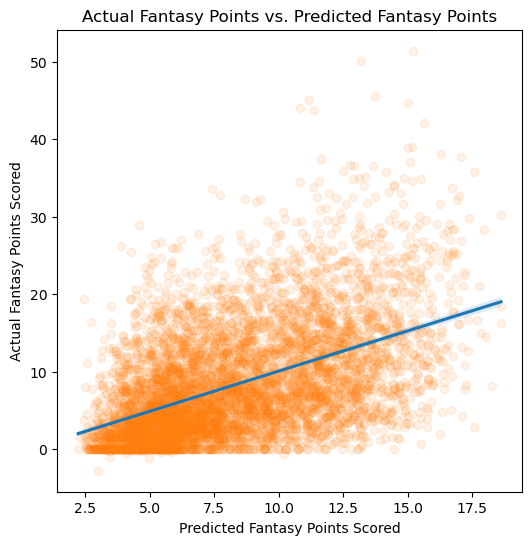

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Fantasy Points',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Fantasy Points vs. Predicted Fantasy Points')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Fantasy Points Scored')

plt.show()

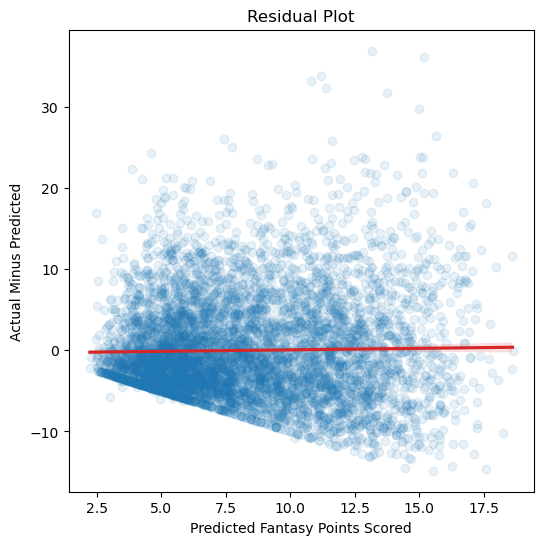

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Fantasy Points'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [17]:
import shap

explainer = shap.DeepExplainer(mod, X_train.to_numpy())

shap_values = explainer(X_train.to_numpy())

shap_values.feature_names = X_train.columns

shap_values.shape

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


(3412, 6, 1)

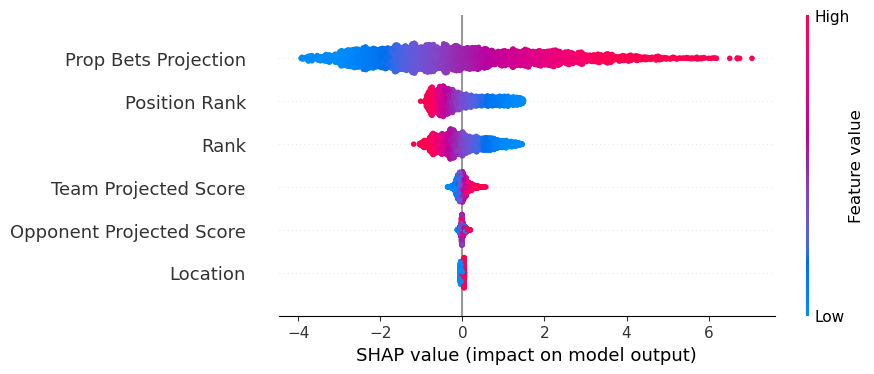

In [18]:
shap.plots.beeswarm(shap_values[:, :, 0], max_display=None)

### Save Predictions

In [19]:
df_test.to_parquet('../../../data/out_of_sample_predictions/wr.parquet')

print('Done')

Done
